In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install xgboost==1.3.1

In [3]:
#loan_data  = pd.read_csv("loan_train.csv" )
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv",index_col=False)
#loan_data = loan_data.drop(['Unnamed: 0'], axis=1)

In [4]:
#test_data = pd.read_csv('loan_test.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')

In [5]:
loan_data.head(10)

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1
5,5,LP001603,Male,Yes,0,Not Graduate,Yes,4344,736.0,87.0,360.0,1.0,Semiurban,0
6,6,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,0
7,7,LP002706,Male,Yes,1,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,1
8,8,LP001859,Male,Yes,0,Graduate,No,14683,2100.0,304.0,360.0,1.0,Rural,0
9,9,LP001228,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban,0


In [6]:
loan_data.drop('Loan_ID', inplace=True, axis=1)
loan_data.drop('Unnamed: 0', inplace=True, axis=1)

In [7]:
loan_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1
5,Male,Yes,0,Not Graduate,Yes,4344,736.0,87.0,360.0,1.0,Semiurban,0
6,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,0
7,Male,Yes,1,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,1
8,Male,Yes,0,Graduate,No,14683,2100.0,304.0,360.0,1.0,Rural,0
9,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban,0


In [8]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [9]:
test_data.drop('Loan_ID', inplace=True, axis=1)

In [10]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [11]:
loan_data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [12]:
loan_data.isnull().sum()

Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             481 non-null    object 
 1   Married            490 non-null    object 
 2   Dependents         482 non-null    object 
 3   Education          491 non-null    object 
 4   Self_Employed      462 non-null    object 
 5   ApplicantIncome    491 non-null    int64  
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         475 non-null    float64
 8   Loan_Amount_Term   478 non-null    float64
 9   Credit_History     448 non-null    float64
 10  Property_Area      491 non-null    object 
 11  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 46.2+ KB


In [14]:
loan_data.Loan_Status.value_counts()

1    343
0    148
Name: Loan_Status, dtype: int64

In [15]:
loan_data.Gender.value_counts()

Male      393
Female     88
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

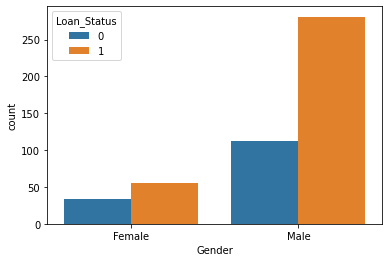

In [16]:
sns.countplot(x='Gender',hue='Loan_Status',data=loan_data)

<AxesSubplot:xlabel='Married', ylabel='count'>

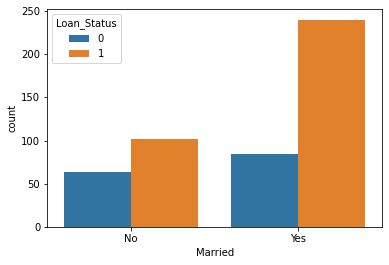

In [17]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_data)

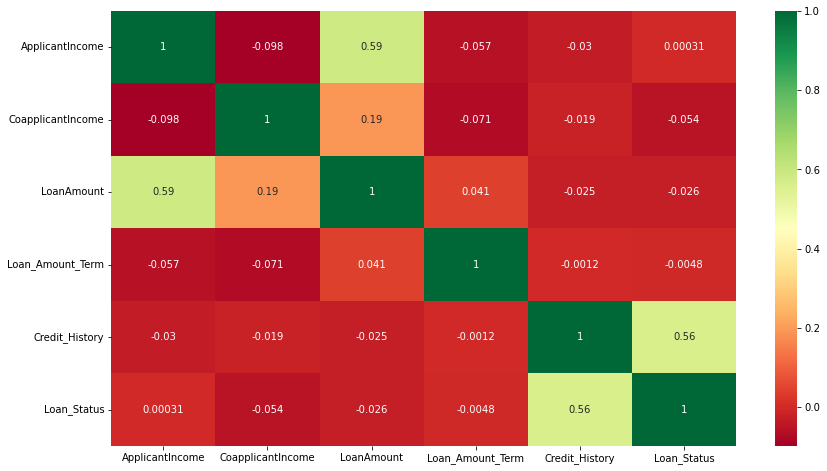

In [18]:
#Plotting correlation
corrmat= loan_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,8))

#To plot heatmap
g=sns.heatmap(loan_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [19]:
num_cols = loan_data.select_dtypes(include=np.number).columns

loan_data[num_cols] = loan_data[num_cols].fillna(loan_data[num_cols].mean())

In [20]:
cat_cols = loan_data.select_dtypes(include = 'object').columns

loan_data[cat_cols] = loan_data[cat_cols].fillna(loan_data[cat_cols].mode())

In [21]:
loan_data.isnull().sum()

Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
from sklearn.impute import SimpleImputer 

mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
mode_imputer = mode_imputer.fit(loan_data[['Gender']])
loan_data[['Gender']] = mode_imputer.transform(loan_data[['Gender']]).ravel()

In [23]:
mode_imputer = mode_imputer.fit(loan_data[['Married']])
loan_data[['Married']] = mode_imputer.transform(loan_data[['Married']]).ravel()
mode_imputer = mode_imputer.fit(loan_data[['Dependents']])
loan_data[['Dependents']] = mode_imputer.transform(loan_data[['Dependents']]).ravel()
mode_imputer = mode_imputer.fit(loan_data[['Self_Employed']])
loan_data[['Self_Employed']] = mode_imputer.transform(loan_data[['Self_Employed']]).ravel()

In [24]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
test_data.isnull().sum()

Gender               3
Married              2
Dependents           6
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           6
Loan_Amount_Term     1
Credit_History       7
Property_Area        0
dtype: int64

In [26]:
num_colst = test_data.select_dtypes(include=np.number).columns

test_data[num_colst] = test_data[num_colst].fillna(test_data[num_colst].mean())

In [27]:
cat_colst = test_data.select_dtypes(include = 'object').columns

test_data[cat_colst] = test_data[cat_colst].fillna(test_data[cat_colst].mode())

In [28]:
test_data.isnull().sum()

Gender               3
Married              2
Dependents           6
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [29]:
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
mode_imputer = mode_imputer.fit(test_data[['Gender']])
test_data[['Gender']] = mode_imputer.transform(test_data[['Gender']]).ravel()

In [30]:
mode_imputer = mode_imputer.fit(test_data[['Married']])
test_data[['Married']] = mode_imputer.transform(test_data[['Married']]).ravel()
mode_imputer = mode_imputer.fit(test_data[['Dependents']])
test_data[['Dependents']] = mode_imputer.transform(test_data[['Dependents']]).ravel()
mode_imputer = mode_imputer.fit(test_data[['Self_Employed']])
test_data[['Self_Employed']] = mode_imputer.transform(test_data[['Self_Employed']]).ravel()

In [31]:
test_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [32]:
test_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

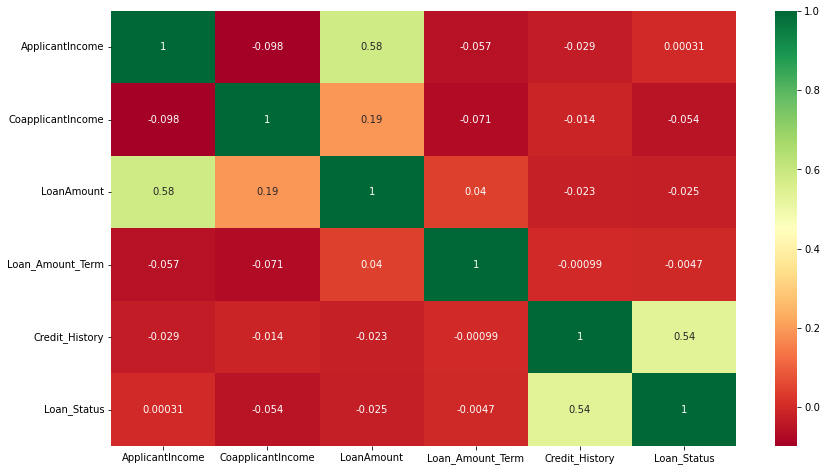

In [33]:
#Plotting correlation
corrmat= loan_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,8))

#To plot heatmap
g=sns.heatmap(loan_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [34]:
loan_data.shape, test_data.shape

((491, 12), (123, 11))

In [35]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.000000,1.0,Semiurban,1
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.000000,1.0,Rural,1
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.000000,1.0,Urban,0
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,341.297071,1.0,Urban,1
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.000000,1.0,Semiurban,1


In [36]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [37]:
loan_data = pd.get_dummies(loan_data, columns=cat_cols)
loan_data.shape
loan_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,4547,0.0,115.0,360.000000,1.0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
1,5703,0.0,130.0,360.000000,1.0,1,0,1,0,1,...,0,0,1,0,1,0,1,1,0,0
2,4333,2451.0,110.0,360.000000,1.0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
3,4695,0.0,96.0,341.297071,1.0,1,0,1,0,1,...,0,0,0,0,1,0,1,0,0,1
4,6700,1750.0,230.0,300.000000,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0


In [38]:
test_data = pd.get_dummies(test_data, columns=cat_colst)
test_data.shape
test_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,3748,1668.0,110.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0
1,4000,7750.0,290.0,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
2,2625,6250.0,187.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
3,3902,1666.0,109.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0
4,6096,0.0,218.0,360.0,0.0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0


In [39]:
y_train = loan_data['Loan_Status']
X_train = loan_data
X_train.drop(columns='Loan_Status', inplace=True)
X_train.shape

(491, 20)

In [40]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state = 0, max_depth=2, n_estimators=100, learning_rate = 0.05, min_child_weight= 3)
xgb_model.fit(X_train, y_train)

C:\Users\dell\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:43:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Feature Importances :  [0.03946672 0.08256008 0.04387981 0.03451815 0.4595935  0.
 0.         0.06363528 0.         0.         0.06110645 0.04000716
 0.         0.03506068 0.         0.         0.         0.06693023
 0.07324192 0.        ]


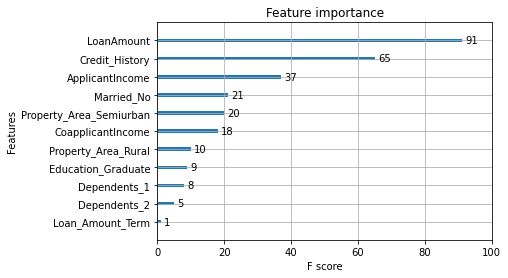

In [41]:
from xgboost import plot_importance

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()

In [47]:
y_pred_train = xgb_model.predict()

In [48]:
y_pred_train_1 = xgb_model.predict_proba(X_train)
a=y_pred_train_1[0]
a=str(int(a[1]*100))

b="approve "

c = b + "Chances of loan getting the loan approved :" + a + "%"
print(c)

approve Chances of loan getting the loan approved :83%


In [49]:
print("%s Chances of loan getting the loan approved : %s ,  "%(a,b))

83 Chances of loan getting the loan approved : approve  ,  


In [50]:
from sklearn import metrics
metrics.accuracy_score(y_pred_train,y_train)

0.8126272912423625

In [60]:
xgb_model.decision_path(X_train,y_train)

AttributeError: 'XGBClassifier' object has no attribute 'decision_path'

In [51]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_pred_train,y_train)
print(cf_matrix)

[[ 62   6]
 [ 86 337]]


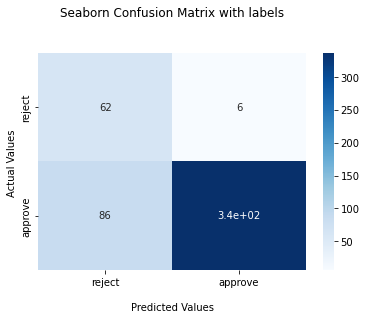

In [62]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['reject','approve'])
ax.yaxis.set_ticklabels(['reject','approve'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [61]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from xgboost import XGBClassifier
clf_GBDT = XGBClassifier(random_state=1)
parameters = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}
#parameters =  {'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],'n_estimators' :[5,10,50, 75, 100, 200]}
xgb_model1 = GridSearchCV(clf_GBDT , parameters, scoring='roc_auc',return_train_score=True,n_jobs=-1)
xgb_model1.fit(X_train, y_train)

In [ ]:
grid_search_1.fit(X_train, y_train)

In [ ]:
grid_search_1.best_params_

In [ ]:
best_grid = grid_search_1.best_estimator_

In [ ]:
y_pred = xgb_model.predict(test_data)


In [ ]:
pd.Series(y_pred).value_counts()

In [60]:
import joblib
#save model
joblib.dump(xgb_model, 'xgb_jobmodel.pkl')

['xgb_jobmodel.pkl']

In [61]:
xgb_model.save_model('xgb_model.json')

In [62]:
import pickle
pkl_file = "pkl_xgb_model.pkl"

pickle.dump(xgb_model, open(pkl_file, 'wb'))